# Berkeley Hills earthquakes

Playing around with a dataset of earthquakes in the Berkeley Hills, for the research workflow workshop (Jupyter session), organized for the incoming graduate student cohort of the Earth and Planetary Science Department at the University of California, Berkeley.

## What is this?

> The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

Basically, you can think of the notebook as an "all-inclusive" interactive document that integrates code, code output, and descriptive text. This is (almost) perfect for reproducible science!

* browser-based
* many languages supported (Python, R, Matlab... this notebook is in Python 3)

The core of any notebook is built upon two types of cells: **text** and **code**.

---

This is an example of a text cell.

You can write text here using Markdown syntax, and the notebook will typeset your text once you "execute" the cell.

Some examples...

#### look at me I'm a level 4 header

*look at me I'm italic text*

* I'm
* a
* list

> a quote, for when you can't be bothered to come up with your own words

`beep() boop.beep boop[]`

$$
\sum\frac{x^{2}}{y_{2}}
$$

~~why even bother showing me if you're going to cross me out anyway~~

| some other stuff | and more stuff |
|------------------|----------------|
| $\sigma$         | $\frac{X}{Y}$  |
| **bold**         | $\Sigma$       |

<font color='red'>RED TEXT</font>

Refer to websites such as this to learn more about Markdown syntax: https://www.markdownguide.org/cheat-sheet/

Refer to websites such as this to learn more about LaTeX syntax: https://wch.github.io/latexsheet/

---

Below is an example of a code cell:

In [1]:
x = 1
y = 2

print(x + y)

---

You can perform notebook actions using the menubar, but here are a few actions that are very common so I find it just good to know the shortcuts to speed things up:

* command mode (`Esc`):
    * `a`: create code cell above
    * `b`: create code cell below
    * `d, d`: delete cell
    * `m`: convert cell into Markdown
    * `y`: convert cell into code
    
* edit mode (`Enter`):
    * `Shift + Enter`: execute cell and move one cell down
        * creates cell below if none exists
        
Other shortcuts can be viewed/edited in the `Help` menu.

## Let's do something

in Python. Sorry R/Matlab users.

### Importing the data

The dataset we will be playing around with contains information about earthquakes in the Berkeley Hills (https://earthquake.usgs.gov/earthquakes/search/). Fortunately for us, the dataset is already cleaned up and formatted as a nice comma-separated table, so let's read it in using `pandas`.

First, import standard modules:

In [2]:
# pandas deals with data tables nicely
import pandas as pd

# matplotlib deals with plotting nicely
import matplotlib.pyplot as plt

# numpy deals with matrices nicely
import numpy as np

Read in the file using `pandas`:

In [3]:
# read in the file
EQ = pd.read_csv('Berkeley-Hills-earthquakes.csv')

# display the top of the table to check if it was read in correctly
EQ.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-09-22T09:26:07.640Z,37.879833,-122.232000,8.57,0.87,md,25.0,52.0,0.004587,0.05,nc,nc72303571,2014-09-23T22:28:37.410Z,"3km ENE of Berkeley, California",earthquake
1,2014-09-21T05:18:51.600Z,37.865000,-122.248167,9.94,0.83,md,19.0,85.0,0.010660,0.03,nc,nc72302966,2014-09-24T01:52:03.888Z,"2km ESE of Berkeley, California",earthquake
2,2014-09-12T13:51:34.500Z,37.903000,-122.207167,5.36,0.60,md,12.0,74.0,0.022830,0.06,nc,nc72297316,2014-09-19T03:25:01.260Z,"3km NW of Orinda, California",earthquake
3,2014-09-11T23:02:55.600Z,37.898500,-122.202800,5.20,0.60,Md,9.0,111.6,0.017966,0.06,nc,nc72296911,2014-09-17T06:20:04.903Z,"3km NW of Orinda, California",earthquake
4,2014-09-11T01:00:40.000Z,37.902700,-122.204800,4.90,0.50,Md,11.0,75.6,0.026949,0.06,nc,nc72296146,2014-09-17T00:03:56.508Z,"3km NW of Orinda, California",earthquake


In [4]:
EQ['time'][0]

'2014-09-22T09:26:07.640Z'

`pandas` was smart enough to read in most columns correctly, but it didn't do so well with the columns that contain time information. Let's fix that:

In [5]:
# overwrite the raw columns with the correctly interpreted columns
EQ['time'] = pd.to_datetime(EQ['time'])
EQ['updated'] = pd.to_datetime(EQ['updated'])

EQ.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-09-22 09:26:07.640000+00:00,37.879833,-122.232000,8.57,0.87,md,25.0,52.0,0.004587,0.05,nc,nc72303571,2014-09-23 22:28:37.410000+00:00,"3km ENE of Berkeley, California",earthquake
1,2014-09-21 05:18:51.600000+00:00,37.865000,-122.248167,9.94,0.83,md,19.0,85.0,0.010660,0.03,nc,nc72302966,2014-09-24 01:52:03.888000+00:00,"2km ESE of Berkeley, California",earthquake
2,2014-09-12 13:51:34.500000+00:00,37.903000,-122.207167,5.36,0.60,md,12.0,74.0,0.022830,0.06,nc,nc72297316,2014-09-19 03:25:01.260000+00:00,"3km NW of Orinda, California",earthquake
3,2014-09-11 23:02:55.600000+00:00,37.898500,-122.202800,5.20,0.60,Md,9.0,111.6,0.017966,0.06,nc,nc72296911,2014-09-17 06:20:04.903000+00:00,"3km NW of Orinda, California",earthquake
4,2014-09-11 01:00:40+00:00,37.902700,-122.204800,4.90,0.50,Md,11.0,75.6,0.026949,0.06,nc,nc72296146,2014-09-17 00:03:56.508000+00:00,"3km NW of Orinda, California",earthquake


In [6]:
EQ['time'][0]

Timestamp('2014-09-22 09:26:07.640000+0000', tz='UTC')

### Data exploration

Let's get a rough sense of what we're dealing with:

In [7]:
# general information about the dataframe
EQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 15 columns):
time         325 non-null datetime64[ns, UTC]
latitude     325 non-null float64
longitude    325 non-null float64
depth        325 non-null float64
mag          325 non-null float64
magType      323 non-null object
nst          132 non-null float64
gap          253 non-null float64
dmin         169 non-null float64
rms          171 non-null float64
net          325 non-null object
id           325 non-null object
updated      325 non-null datetime64[ns, UTC]
place        325 non-null object
type         325 non-null object
dtypes: datetime64[ns, UTC](2), float64(8), object(5)
memory usage: 38.2+ KB


In [8]:
# basic stats for the numerical columns
EQ.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,325.000000,325.000000,325.000000,325.000000,132.000000,253.000000,169.000000,171.000000
mean,37.872797,-122.233251,7.608185,1.927077,25.045455,81.954545,0.014857,0.091813
std,0.035196,0.042846,2.395682,1.019863,26.172902,44.787405,0.013212,0.079430
min,37.780000,-122.325000,0.000000,0.000000,3.000000,14.400000,0.000000,0.020000
25%,37.856000,-122.251800,6.000000,0.900000,7.000000,50.400000,0.008983,0.060000
50%,37.877000,-122.232000,7.700000,2.000000,14.000000,68.400000,0.008983,0.080000
75%,37.894000,-122.214667,9.100000,2.700000,33.250000,111.600000,0.026949,0.110000
max,37.936800,-122.081000,16.200000,4.800000,120.000000,294.000000,0.062882,0.800000


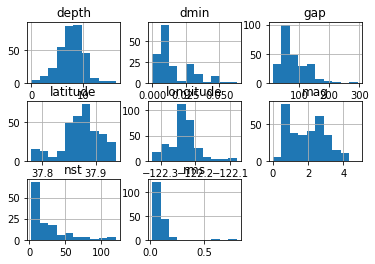

In [9]:
# quick plot histograms for the numerical columns
EQ.hist()

plt.show()

Doesn't look great... what can we do to make this look nicer?

* `Shift + Tab + Tab`: show docstring
* Google, stackoverflow, YouTube, your friends...

![reddit 1](image1.jpg)

![reddit 2](image2.jpg)

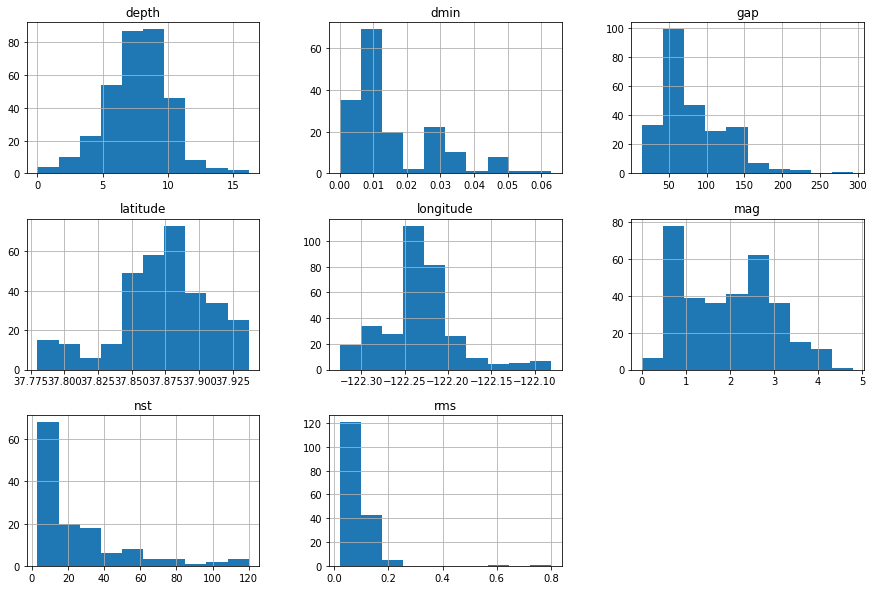

In [10]:
EQ.hist(figsize=(15,10))

plt.show()

### Plotting

The quick and dirty way:

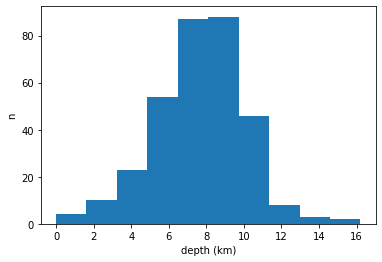

In [11]:
# make the histogram
plt.hist(EQ['depth'])

# set the x and y labels
plt.xlabel('depth (km)')
plt.ylabel('n')

# show it
plt.show()

A far, far, far, superior way for the more intelligent among you:

(just kidding - the above way is fine)

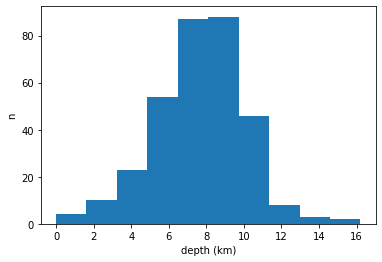

In [12]:
# set up the figure and axis handles
fig, ax = plt.subplots()

# make the histogram on the axis
ax.hist(EQ['depth'])

# x and y labels
ax.set_xlabel('depth (km)')
ax.set_ylabel('n')

# show it
plt.show(fig)

* more control
* less ambiguity
* more reproducible
* not(/less) sensitive to the order that you type things

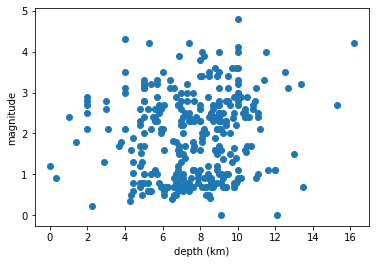

In [13]:
# set up the figure and axis handles
fig, ax = plt.subplots()

# make the histogram on the axis
ax.scatter(EQ['depth'], EQ['mag'])

# x and y labels
ax.set_xlabel('depth (km)')
ax.set_ylabel('magnitude')

# show it
plt.show(fig)

An example of getting a little fancy:

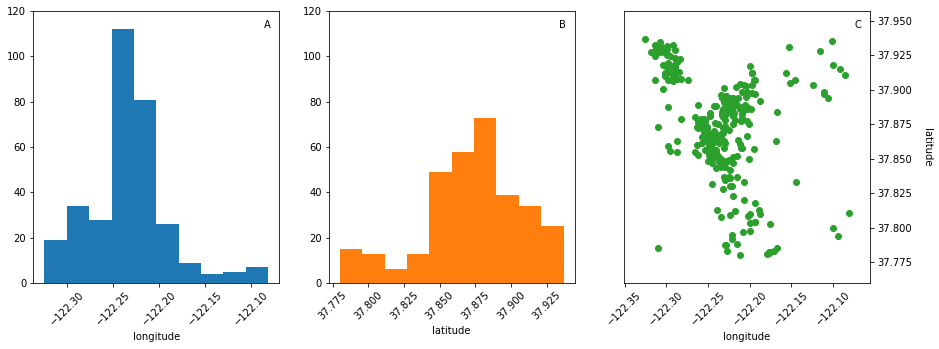

In [14]:
# set up the figure and axis handles
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# make the basic plots
ax[0].hist(EQ['longitude'], color='C0')
ax[1].hist(EQ['latitude'], color='C1')
ax[2].scatter(EQ['longitude'], EQ['latitude'], c='C2')

# make the y-axis the same for the two histograms
hist_ylim_max = 120
ax[0].set_ylim(0, hist_ylim_max)
ax[1].set_ylim(0, hist_ylim_max)

# set axis labels
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('latitude')
ax[2].set_xlabel('longitude')

# rotate x tick labels
for i in range(len(ax)):
    plt.setp(ax[i].get_xticklabels(), rotation=45)
    
# move the yaxis labels to the right for the scatter plot
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position('right')
ax[2].set_ylabel('latitude', rotation=270, labelpad=20)

# label them
panel_labels = ['A', 'B', 'C']
for i in range(len(ax)):
    ax[i].text(0.95, 0.95, panel_labels[i],
               horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)

plt.show(fig)

Isn't panel C a map?

Let's actually plot the data on a map. To do so, we'll use `cartopy`. To install this package:

```
conda install cartopy
```

or 

```
conda install -c conda-forge cartopy
```

In [15]:
import cartopy.crs as ccrs

First, a global map:

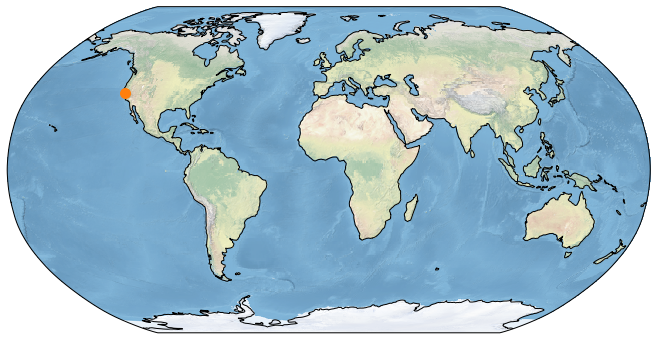

In [16]:
# set up the figure handle
fig = plt.figure(figsize=(15,6))

# add a Robinson projection axis to the figure
ax = plt.subplot(1,1,1, projection=ccrs.Robinson())

# draw the stock image
ax.stock_img()

# draw the coastlines
ax.coastlines()

# plot a point where Berkeley is
ax.scatter([-122.2730], [37.8715], s=100, c='C1', transform=ccrs.PlateCarree(), zorder=100)

plt.show()

Now zoom in to the area of interest, and plot the earthquake locations:

In [17]:
# this function allows us to use other stock images
from cartopy.io import img_tiles

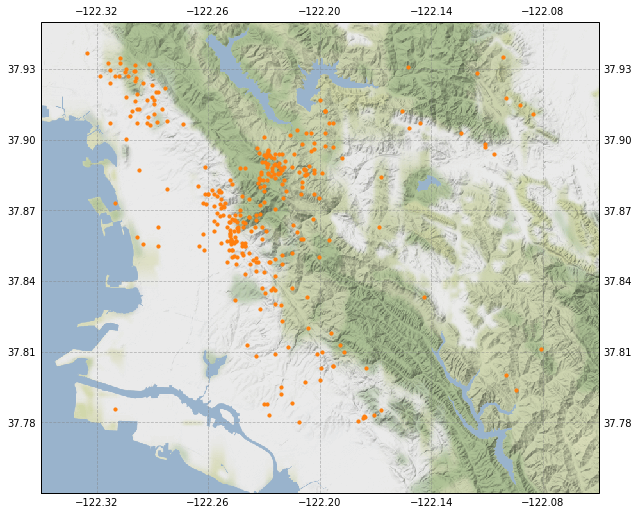

In [18]:
# set up the figure handle
fig = plt.figure(figsize=(10,10))

# get the stock image
terrain = img_tiles.Stamen('terrain-background')

# add an axis to the figure, using the projection of the stock image
ax = plt.subplot(1,1,1, projection=terrain.crs)

# draw the stock image, at level 12 resolution
ax.add_image(terrain, 12)

# plot the earthquakes
ax.scatter(EQ['longitude'], EQ['latitude'], c='C1', s=10, transform=ccrs.Geodetic(), zorder=100)

# zoom to the area of interest
ax.set_extent([-122.35, -122.05, 37.750, 37.950], crs=ccrs.Geodetic())

# draw grid lines
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             color='gray', alpha=0.5, linestyle='--')

plt.show()

### Restart and Run All

While developing code in the notebook, it is not uncommon to move code around, change variable names, paths to files, etc. This may unintentionally lead to a notebook that does not execute from start to finish (which defeats a large part of why these notebooks exist). It is therefore good practice to "Restart & Run All" to make sure your notebook actually executes.

## Other useful Jupyter things

* find and replace
    * `Edit` > `Find and Replace`
* table of contents
    * Jupyter notebook extensions: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/
```
conda install -c conda-forge jupyter_contrib_nbextensions
```
* progress bar
    * https://tqdm.github.io
* widgets
* other languages:
    * Python 2: https://docs.anaconda.com/anaconda/user-guide/tasks/switch-environment/
    * Matlab: https://am111.readthedocs.io/en/latest/jmatlab_install.html
    * R: https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/
* sharing:
    * as a static document:
        * `File` > `Download as`
        * https://nbviewer.jupyter.org
    * version-controlled sharing:
        * GitHub (learn more next week)
* Jupyter lab
    * instead of typing `jupyter notebook` in your terminal/command prompt, type `jupyter lab` instead

`tqdm`:

In [19]:
# import the required modules
from tqdm import tqdm_notebook
from time import sleep

In [20]:
# a simple nested for loop... but who knows how long we'll be waiting for?
for i in range(10):
    for j in range(100):
        sleep(0.01)

In [21]:
# the same nested for loop, but now with a progress bar
for i in tqdm_notebook(range(10), desc='1st loop'):
    for j in tqdm_notebook(range(100), desc='2nd loop', leave=False):
        sleep(0.01)

`widgets`:

In [22]:
# import the widgets module
import ipywidgets as widgets

# use the "magic" to set the values for the interactive variables
@widgets.interact(frequency=(-5.,5.), color=['blue', 'red', 'green'], lineweight=(1., 10.))

# define a function that will create the plot, using parameters that you want to be interactive
def widget_plot(frequency=1., color='blue', lineweight=2., grid=True):
    """
    Plot an interactive sin plot using ipywidgets.
    
    Parameters
    ----------
    frequency : float, optional
        Frequency of sin wave.
        
    color : string, optional
        Color of curve - must be 'blue', 'red', or 'green'.
        
    lineweight : float, optional
        Weight of curve.
        
    grid : boolean, optional
        If True, plot grid.
    """
    # set up the x-array
    x = np.linspace(-1., +1., 100)
    
    # set up the figure
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # calculate y
    y = np.sin(2 * np.pi * frequency * x)
    
    # plot
    ax.plot(x, y, lw=lineweight, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='frequency', max=5.0, min=-5.0), Dropdown(description…

Note that, if formatted properly, your docstring will automatically be recognized as such:

## Other useful non-Jupyter things

* Atom
    * a text editor
    * https://atom.io
* Lepton
    * a code snippet manager
    * http://hackjutsu.com/Lepton/